# Univariate Linear Regression
https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-1-6b8dd1c73d80

First some context on the problem statement.

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
<img src='./Hypothesis.png'>
## Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The file ex1data1.txt contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss

In [51]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data[0] # read first column
y = data[1] # read second column
m = len(y) # number of training example
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Reading and Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population)

Text(0,0.5,'Profit in $10,000s')

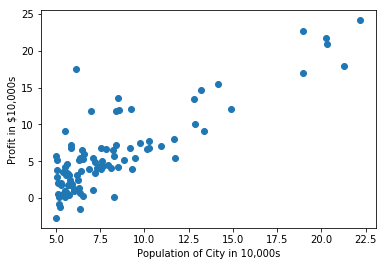

In [52]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.hstack.html

In [53]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
# Note on np.newaxis: When you read data into X, y you will observe that X, y are rank 1 arrays. rank 1 array will have a shape
# of (m, ) where as rank 2 arrays will have a shape of (m,1). When operating on arrays its good to convert rank 1 arrays to rank 
# 2 arrays because rank 1 arrays often give unexpected results.
# o convert rank 1 to rank 2 array we use someArray[:,np.newaxis].

theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term ----> explained below

<img src='./Matrix-Vector-Multiplication.png'>

# Computing the cost
<img src='./CostFunction.png'>

In [54]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)
print(theta)

32.072733877455676
[[0.]
 [0.]]


# Finding the optimal parameters using Gradient Descent
<img src='./Gradient-descent.png'>

In [55]:
def gradientDescent(X,y,m,theta,iterations):
    for start in range(iterations):
        temp = np.dot(X,theta) - y
        temp = np.dot(X.T,temp)
        theta = theta - (alpha/m)*temp
    return theta
theta = gradientDescent(X,y,m,theta,iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


##### We now have the optimized value of theta . Use this value in the above cost function.Plot showing the best fit line

In [56]:
J = computeCost(X,y,theta)
print(J)

4.483388256587726


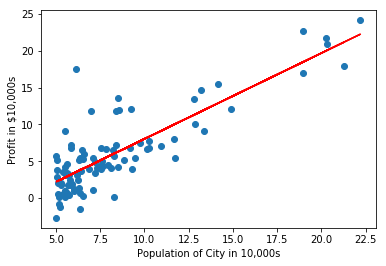

In [59]:
plt.scatter(X[:,1],y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1],np.dot(X,theta),'r')